In [1]:
import pandas as pd
import numpy as np
import pickle

from ucimlrepo import fetch_ucirepo 

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from TopoTree import TopoTree
from TopoMap import TopoMap
from HierarchicalTopoMap import HierarchicalTopoMap

In [2]:
def plot_topomap_comparison(proj_original, proj_new,
                            df, y_column, hiertopomap=None):
    colors = [px.colors.qualitative.D3[i] for i in range(10)]
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for i, cluster in enumerate(df[y_column].unique()):
        i_cluster = list(df[df[y_column]==cluster].index)
        axs[0].scatter(proj_original[i_cluster,0], proj_original[i_cluster,1],
                        c=colors[i], s=5)
        
        axs[1].scatter(proj_new[i_cluster,0], proj_new[i_cluster,1],
                        c=colors[i], s=5)
        
    if not hiertopomap is None:
        hulls = hiertopomap.get_components_hull()
        for j, sub in enumerate(hiertopomap.subsets):
            if len(sub) > 10:
                comp_ids = list(hiertopomap.subsets[j])
                points_ids = [comp_ids[i] for i in hulls[j].vertices]
                points = hiertopomap.projections[points_ids,:]
                
                axs[1].fill(points[:,0], points[:,1], 'k', alpha=0.3)
                points = list(points)
                points.append(points[0])
                xs, ys = zip(*points)
                axs[1].plot(xs, ys, linestyle='dashed', color='grey')

            
    axs[0].set_title('Original Projection')
    axs[1].set_title('New Projection')

    fig.suptitle('Comparison of projections')
    plt.tight_layout()

    return fig

def plot_proj_max_dists(X, df, y_column, max_dists, min_points_component=2):
    
    colors = [px.colors.qualitative.D3[i] for i in range(10)]
    
    projs = []
    topos = []

    for d in max_dists:
        hiertopomap = HierarchicalTopoMap(X.to_numpy(),
                                      max_dist=d, 
                                      min_points_component=min_points_component)
        projs.append(hiertopomap.run())
        topos.append(hiertopomap)

    n_plots = len(max_dists)
    fig, axs = plt.subplots(1, n_plots, figsize=(n_plots*4, 4))

    for d in range(n_plots):
        i = 0
        for cluster in df[y_column].unique():
            i_cluster = list(df[df[y_column]==cluster].index)
            axs[d].scatter(projs[d][i_cluster,0], projs[d][i_cluster,1],
                    c=colors[i], s=5)
            i += 1

        hulls = topos[d].get_components_hull()
        for j, sub in enumerate(topos[d].subsets):
            if len(sub) > 10:
                comp_ids = list(topos[d].subsets[j])
                points_ids = [comp_ids[i] for i in hulls[j].vertices]
                points = topos[d].projections[points_ids,:]
                
                axs[d].fill(points[:,0], points[:,1], 'k', alpha=0.3)
                points = list(points)
                points.append(points[0])
                xs, ys = zip(*points)
                axs[d].plot(xs, ys, linestyle='dashed', color='grey')
            
        axs[d].set_xticks([])
        axs[d].set_yticks([])
        axs[d].set_title(f'Max distance = {max_dists[d]}')

    fig.suptitle('Projection with different max_dists')
    plt.tight_layout()

    return fig

## MFeat dataset

In [3]:
data_mfeat = pd.read_csv('data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X_mfeat = data_mfeat.drop(['class'], axis=1)
y_mfeat = data_mfeat[['class']]

In [4]:
hiertopomap = HierarchicalTopoMap(X_mfeat.to_numpy(), max_dist=12, min_points_component=10)
proj_mfeat = hiertopomap.run()

[INFO] Min distance hit. Distance: 12.000167091143423 | Max_dist: 12
Max_density: 0.007
Scalling component 0 - Density: 0.002 - Alpha: 6.628... scaling - initial area: 90318.992...done - final area: 3968173.500.
Scalling component 33 - Density: 0.002 - Alpha: 6.158... scaling - initial area: 82049.633...done - final area: 3111782.750.
Scalling component 59 - Density: 0.001 - Alpha: 8.141... scaling - initial area: 239520.109...done - final area: 15872698.000.
Scalling component 67 - Density: 0.002 - Alpha: 6.857... scaling - initial area: 70753.391...done - final area: 3327068.000.
Scalling component 114 - Density: 0.002 - Alpha: 6.079... scaling - initial area: 60880.559...done - final area: 2250062.500.
Scalling component 180 - Density: 0.001 - Alpha: 7.419... scaling - initial area: 221539.703...done - final area: 12194405.000.
Scalling component 225 - Density: 0.003 - Alpha: 4.735... scaling - initial area: 18727.191...done - final area: 419915.750.
Scalling component 228 - Density

In [5]:
topomap = TopoMap(X_mfeat.to_numpy())
proj_topomap_mfeat = topomap.run()

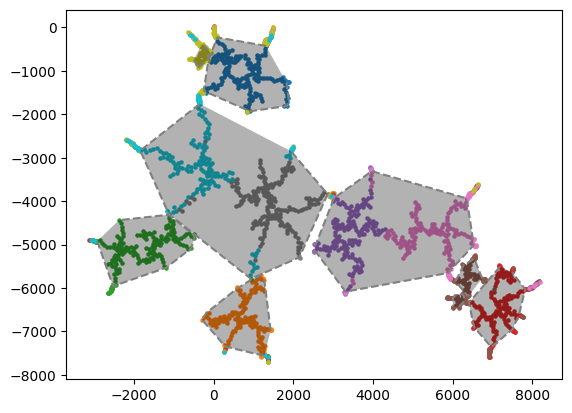

In [6]:
colors = [px.colors.qualitative.D3[i] for i in range(10)]

for i, cluster in enumerate(data_mfeat['class'].unique()):
    i_cluster = list(data_mfeat[data_mfeat['class']==cluster].index)
    plt.scatter(proj_mfeat[i_cluster,0], proj_mfeat[i_cluster,1],
                    c=colors[i], s=5)
    
if not hiertopomap is None:
    hulls = hiertopomap.get_components_hull()
    for j, sub in enumerate(hiertopomap.subsets):
        if len(sub) > 10:
            comp_ids = list(hiertopomap.subsets[j])
            points_ids = [comp_ids[i] for i in hulls[j].vertices]
            points = hiertopomap.projections[points_ids,:]
            
            plt.fill(points[:,0], points[:,1], 'k', alpha=0.3)
            plt.plot(points[:,0], points[:,1], 'grey', linestyle='dashed')

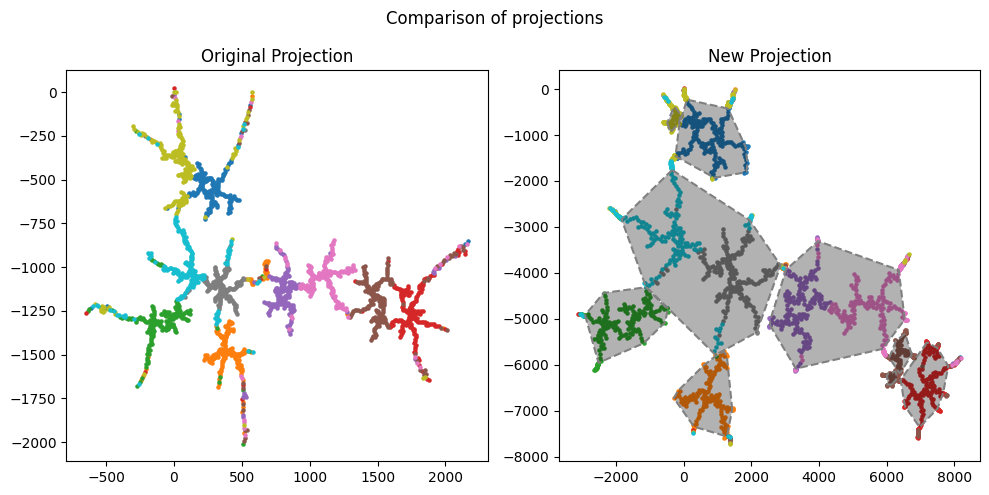

In [7]:
fig = plot_topomap_comparison(proj_topomap_mfeat, proj_mfeat, data_mfeat, 'class',
                              hiertopomap)

[INFO] Min distance hit. Distance: 5.215668904232068 | Max_dist: 5
Max_density: 0.037
[INFO] Min distance hit. Distance: 8.005383009562072 | Max_dist: 8
Max_density: 0.016
Scalling component 1345 - Density: 0.006 - Alpha: 4.997... scaling - initial area: 11180.405...done - final area: 279159.312.
Scalling component 1348 - Density: 0.018 - Alpha: 3.837... scaling - initial area: 735.462...done - final area: 10830.561.
[INFO] Min distance hit. Distance: 10.001378367027483 | Max_dist: 10
Max_density: 0.010
Scalling component 9 - Density: 0.006 - Alpha: 4.965... scaling - initial area: 6170.916...done - final area: 152141.922.
Scalling component 12 - Density: 0.005 - Alpha: 4.539... scaling - initial area: 7385.922...done - final area: 152141.922.
Scalling component 107 - Density: 0.004 - Alpha: 4.909... scaling - initial area: 13485.074...done - final area: 324989.594.
Scalling component 224 - Density: 0.008 - Alpha: 4.533... scaling - initial area: 3042.124...done - final area: 62517.227

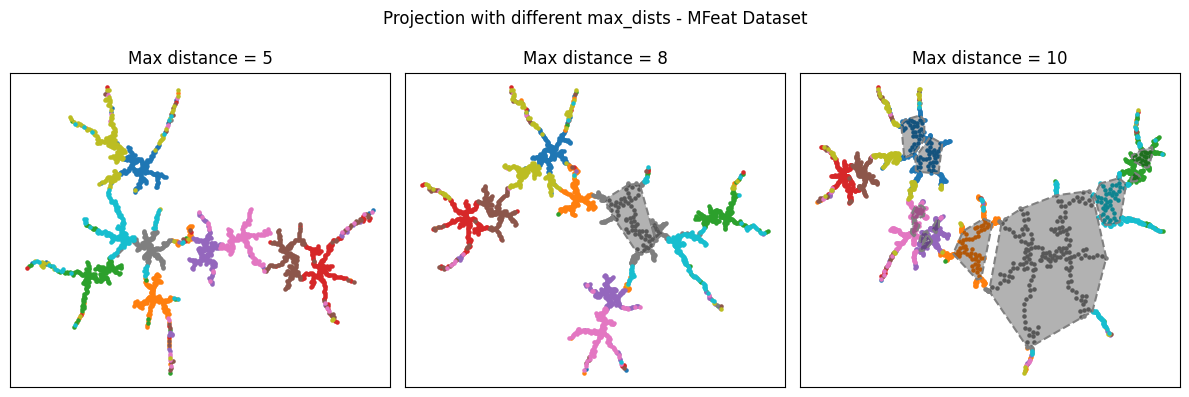

In [8]:
max_dists_mfeat = [5,8,10]
fig = plot_proj_max_dists(X_mfeat, data_mfeat, 'class', max_dists_mfeat, 
                          min_points_component=10)
fig.suptitle('Projection with different max_dists - MFeat Dataset')
plt.show()

## Iris dataset

In [9]:
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

hiertopomap = HierarchicalTopoMap(X.to_numpy(), max_dist=0.4, min_points_component=5)
proj_iris = hiertopomap.run()

[INFO] Min distance hit. Distance: 0.4123105625617659 | Max_dist: 0.4
Max_density: 5.882
Scalling component 0 - Density: 8.132 - Alpha: 8.060... scaling - initial area: 5.780...done - final area: 375.530.
Scalling component 4 - Density: 6.499 - Alpha: 6.564... scaling - initial area: 6.001...done - final area: 258.570.
Scalling component 9 - Density: 4.737 - Alpha: 5.532... scaling - initial area: 8.022...done - final area: 245.480.


In [10]:
topomap = TopoMap(X.to_numpy())
proj_topomap_iris = topomap.run()

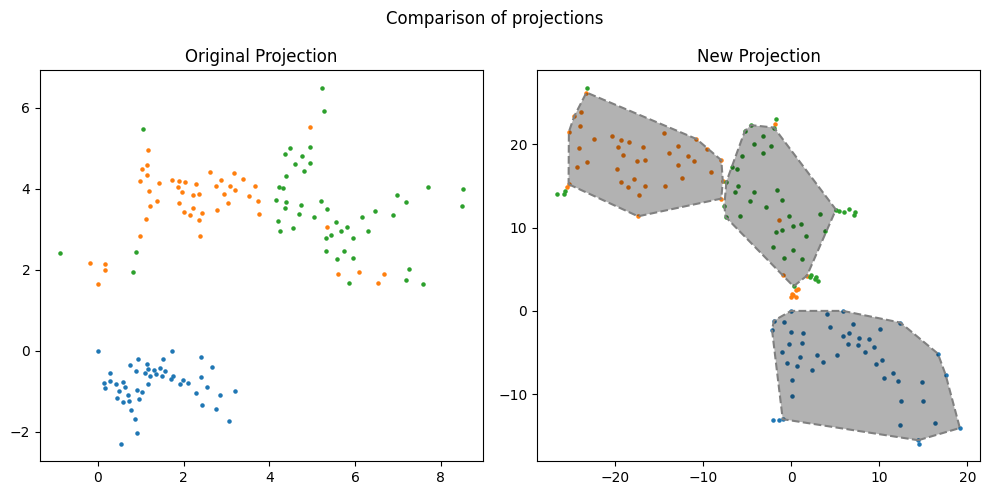

In [11]:
fig = plot_topomap_comparison(proj_topomap_iris, proj_iris, y, 'class',
                              hiertopomap)